<a href="https://colab.research.google.com/github/hasune613/hello-world/blob/main/%E5%9B%A0%E5%AD%90%E5%88%86%E6%9E%90_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
X=FA+UB
$$

* X:データ(データ数(N)×説明変数の数(n))
* F:共通因子行列(N×因子数(m))F:共通因子行列(N×因子数(m)) \\
　※各説明変数が共通して関与する共通因子(列ベクトル)から成る。
* A:(共通因子の)因子負荷量(m×n)A:(共通因子の)因子負荷量(m×n) \\
　※下記で「因子負荷量」と記す時はこちらを指す。
* U:固有因子行列(N×n)U:固有因子行列(N×n) \\
　※各説明変数それぞれが別々の固有因子(列ベクトル)から成る。 \\
* B:固有因子の因子負荷量(N×n)B:固有因子の因子負荷量(N×n)
　※対角行列 \\

因子分析では、この因子負荷量Aを求める
求めた因子負荷量から共通因子の特徴を捉え,共通因子をデータの要約として利用す多い

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
# from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/kaggle/TITANIC/train.csv')
print('train_data : ')
print(f'n = {len(train_data)}')
train_data.head()
# display(train_data.head())

train_data : 
n = 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/kaggle/TITANIC/test.csv')
print('test_data : ')
print(f'n = {len(test_data)}')
test_data.head()

test_data : 
n = 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
col_list = list(train_data.columns)
tmp_test = test_data.assign(Survived=None)
tmp_test = tmp_test[col_list].copy()
print('tmp_test : ')
print(f'n = {len(tmp_test)}')
tmp_test.head()

tmp_test : 
n = 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,None,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,None,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,None,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,None,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,None,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
all_data = pd.concat([train_data, tmp_test],axis=0)
print('all_data : ')
print(f'n = {len(all_data)}')
all_data.head()

all_data : 
n = 1309


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
proc_all_data = all_data.copy()

In [ ]:
#Sex

col = 'Sex'

def app_sex(x):
    if x =='male':
        return 1
    elif x == 'female':
        return 0
    else:
        return 0.5

proc_all_data[col] = proc_all_data[col].apply(app_sex)
print(f'columns : {col}','-' *40)
display(all_data[col].value_counts())
display(proc_all_data[col].value_counts())
print('n of missing :' ,len(proc_all_data.query('{0}!={0}'.format(col))))

columns : Sex ----------------------------------------


male      843
female    466
Name: Sex, dtype: int64

1    843
0    466
Name: Sex, dtype: int64

n of missing : 0


In [ ]:
#Age

col = 'Age'

medi = proc_all_data[col].median()
proc_all_data[col] = proc_all_data[col].fillna(medi)

print(f'columns : {col}','-' * 40)
display(all_data[col].value_counts())
display(proc_all_data[col].value_counts())

print(f'n of missing :' ,len(proc_all_data.query("{0} != {0}".format(col))))


columns : Age ----------------------------------------


24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
76.00     1
22.50     1
74.00     1
80.00     1
0.67      1
Name: Age, Length: 98, dtype: int64

28.00    295
24.00     47
22.00     43
21.00     41
30.00     40
        ... 
76.00      1
22.50      1
74.00      1
80.00      1
0.67       1
Name: Age, Length: 98, dtype: int64

n of missing : 0


In [ ]:
#Fare
col = 'Fare'

medi = proc_all_data[col].median()
proc_all_data[col] = proc_all_data[col].fillna(medi)

print(f'columns : {col}', '-'*40)
display(all_data[col].value_counts())
display(proc_all_data[col].value_counts())
print('n of missing : ', len(proc_all_data.query('{0}!={0}'.format(col))))
print('median : ', medi)

columns : Fare ----------------------------------------


8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

n of missing :  0
median :  14.4542


In [ ]:
#Embarked
col = 'Embarked'

proc_all_data = proc_all_data.drop(columns=[col])
print(f'columns : {col}','-'*40)
display(all_data.head())
display(proc_all_data.head())

columns : Embarked ----------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN


In [ ]:
#cabin
col = 'Cabin'

proc_all_data = proc_all_data.drop(columns=[col])

print(f'columns : {col}', '-'*40)
display(all_data.head())
display(proc_all_data.head())

columns : Cabin ----------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500


In [ ]:
#ticket
col = 'Ticket'
proc_all_data =proc_all_data.drop(columns=[col])
print(f'columns : {col}', '-'*40)
display(all_data.head())
display(proc_all_data.head())

columns : Ticket ----------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500


In [ ]:
#name
col = 'Name'

proc_all_data = proc_all_data.drop(columns=[col])
print(f'columns : ','-'*40)
display(all_data.head())
display(proc_all_data.head())

columns :  ----------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [ ]:
id_col = 'PassengerId'
target_col = 'Survived'

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 説明変数
feature_cols = list(set(proc_all_data.columns)- set([target_col])-set([id_col]))
print('feature_cols : ',feature_cols)
print('len of feature_cols : ',len(feature_cols))

feature_tmp = proc_all_data[feature_cols]

print('features(標準化　前 : ')
display(feature_tmp.head())

#標準化
ss = StandardScaler()
features = pd.DataFrame(
    ss.fit_transform(feature_tmp),columns=feature_cols
)
print('feature(標準化　後 : ')
display(features)

feature_cols :  ['SibSp', 'Pclass', 'Age', 'Sex', 'Parch', 'Fare']
len of feature_cols :  6
features(標準化　前 : 


,SibSp,Pclass,Age,Sex,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,1,1,38.0,0,0,71.2833
2,0,3,26.0,0,0,7.9250
3,1,1,35.0,0,0,53.1000
4,0,3,35.0,1,0,8.0500


feature(標準化　後 : 


,SibSp,Pclass,Age,Sex,Parch,Fare
0,0.481288,0.841916,-0.581628,0.743497,-0.445000,-0.503291
1,0.481288,-1.546098,0.658652,-1.344995,-0.445000,0.734744
2,-0.479087,0.841916,-0.271558,-1.344995,-0.445000,-0.490240
3,0.481288,-1.546098,0.426099,-1.344995,-0.445000,0.383183
4,-0.479087,0.841916,0.426099,0.743497,-0.445000,-0.487824
...,...,...,...,...,...,...
1304,-0.479087,0.841916,-0.116523,0.743497,-0.445000,-0.487824
1305,-0.479087,-1.546098,0.736169,-1.344995,-0.445000,1.462034
1306,-0.479087,0.841916,0.697411,0.743497,-0.445000,-0.503291
1307,-0.479087,0.841916,-0.116523,0.743497,-0.445000,-0.487824


In [ ]:
# 因子分析
n_components = 2
fact_analysis = FactorAnalysis(n_components=n_components)
fact_analysis.fit(features)
# 因子負荷行列 (X = FA + UB の A)
print('因子負荷行列(x =FA + UB の A) : ')
components_df = pd.DataFrame(
    fact_analysis.components_,
    columns=feature_cols
)

display(components_df)

因子負荷行列(x =FA + UB の A) : 


,SibSp,Pclass,Age,Sex,Parch,Fare
0,-0.013757,-0.877418,0.397794,-0.164133,0.052978,0.666731
1,0.571844,0.092836,-0.280156,-0.275992,0.646087,0.292063


In [ ]:
# len(components_df)

2

In [ ]:
#因子
print('因子行列(X = FA + UB の F) : ')
fact_columns = [f'factor_{i+1}' for i in range(n_components)]
factor_df = pd.DataFrame(
    fact_analysis.transform(features),columns=fact_columns
)
display(factor_df.T)

因子行列(X = FA + UB の F) : 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
factor_1,-0.800961,1.359522,-0.697980,1.249772,-0.700648,-0.748717,1.315464,-0.865098,-0.637886,0.154035,-0.797466,1.288773,-0.807901,-0.469331,-0.784126,0.382339,-0.829482,0.107089,-0.616780,-0.687079,0.220269,0.149991,-0.776126,1.050102,-0.754570,-0.408308,-0.754706,2.117442,-0.683902,-0.751448,1.098128,1.653377,-0.684530,0.366656,1.273263,1.226855,-0.754686,-0.800751,-0.713207,-0.771151,...,1.313570,-0.778362,-0.752156,-0.765829,-0.651751,-0.711808,0.106482,0.432519,-0.780636,0.314445,-0.802208,-0.836497,1.296003,1.319804,-0.761345,0.230803,-0.667429,1.161726,-0.783185,1.488149,-0.794936,-0.730787,1.760241,0.213965,1.20957,1.027781,1.116104,0.054076,0.055723,2.077279,-0.684671,-0.818820,-0.684530,1.443261,-0.684408,-0.75070,1.552816,-0.679508,-0.75070,-0.666011
factor_2,-0.024221,-0.039515,-0.131108,-0.090479,-0.474370,-0.396282,-0.861173,1.374272,0.857916,0.222960,0.953639,-0.775282,-0.311063,2.364080,-0.000788,-0.600419,1.723589,-0.566116,0.173086,-0.156102,-0.582539,-0.631438,-0.010870,-0.653359,1.554801,2.621336,-0.401954,2.412941,-0.153093,-0.398869,-0.819781,0.415373,-0.153687,-0.991325,-0.126425,-0.417600,-0.401935,-0.321950,0.626914,0.327086,...,-0.880626,2.193911,-0.399539,-0.377171,-0.122644,0.294994,-0.566690,1.259885,-0.355876,-0.881843,-0.323329,1.330723,-0.332181,-0.147397,0.806412,-0.784469,1.084688,0.126335,-0.358290,0.380600,-0.334102,-0.432278,0.165677,-0.325900,0.26031,-0.480252,-0.540147,-0.475052,-0.210882,0.721422,-0.153822,0.951074,-0.153687,0.057450,-0.153572,-0.39816,-0.189698,-0.516154,-0.39816,0.472518


In [ ]:
#因子間の相関
corr_fact_df = factor_df.corr()
print('因子間の相関 : ')
display(corr_fact_df)

因子間の相関 : 


,factor_1,factor_2
factor_1,1.000000e+00,-8.370282e-14
factor_2,-8.370282e-14,1.000000e+00


In [ ]:
#因子間の相関（少数表記）
def show_float(x):
    return f'{x:.5f}'
print('*少数表記 : ')
display(corr_fact_df.applymap(show_float))

*少数表記 : 


,factor_1,factor_2
factor_1,1.00000,-0.00000
factor_2,-0.00000,1.00000


In [ ]:
# 因子(F)と説明変数(X)の相関

fact_exp_corr_df = pd.DataFrame()

for exp_col in feature_cols: #feature_cols :  ['SibSp', 'Pclass', 'Age', 'Sex', 'Parch', 'Fare']
    data = list()

    for fact_col in fact_columns: #fact_columns : factor_1,factor_2
        x = features[exp_col]
        f = factor_df[fact_col]
        data.append(x.corr(f))

    fact_exp_corr_df[exp_col] = data

print('因子(F)と説明変数(x)の相関 : ')
display(fact_exp_corr_df)

print('\n')

print('[因子負荷行列(A)] - [因子(F)と説明変数(x)の相関] : ')
display(components_df - fact_exp_corr_df)

因子(F)と説明変数(x)の相関 : 


,SibSp,Pclass,Age,Sex,Parch,Fare
0,-0.015164,-0.967146,0.438473,-0.180918,0.058395,0.734914
1,0.727741,0.118145,-0.356534,-0.351234,0.822225,0.371686




[因子負荷行列(A)] - [因子(F)と説明変数(x)の相関] : 


,SibSp,Pclass,Age,Sex,Parch,Fare
0,0.001407,0.089728,-0.040680,0.016785,-0.005418,-0.068182
1,-0.155898,-0.025309,0.076377,0.075242,-0.176138,-0.079623


[factor_1] --------------------------------------------------------------------------------


,component,abs_component,rank_component
Pclass,-0.877418,0.877418,1.0
Fare,0.666731,0.666731,2.0
Age,0.397794,0.397794,3.0
Sex,-0.164133,0.164133,4.0
Parch,0.052978,0.052978,5.0
SibSp,-0.013757,0.013757,6.0


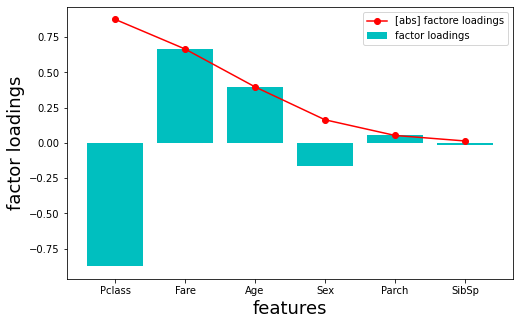

[factor_2] --------------------------------------------------------------------------------


,component,abs_component,rank_component
Parch,0.646087,0.646087,1.0
SibSp,0.571844,0.571844,2.0
Fare,0.292063,0.292063,3.0
Age,-0.280156,0.280156,4.0
Sex,-0.275992,0.275992,5.0
Pclass,0.092836,0.092836,6.0


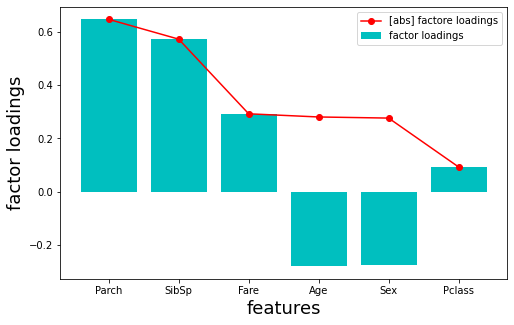

In [ ]:
#グラフ化(棒・折れ線グラフ_各因子の因子負荷量）

for i in range(len(fact_columns)):
    # 対象因子の負荷量
    fact_col = fact_columns[i] # fact_columns : factor_1,factor_2
    component = components_df.iloc[i] # 因子負荷行列 (X = FA + UB の A)
    # 負荷量とその絶対値、絶対値のランク
    df = pd.DataFrame({
        'component':component,
        'abs_component':component.abs()
    }) 
    df['rank_component'] = df['abs_component'].rank(ascending=False)#降順
    # display(df.rank_component)
    # display(df.abs_component)
    df.sort_values(by = 'rank_component', inplace=True)
    print(f'[{fact_col}]','-'*80)
    display(df)

    x_ticks = df.index.tolist()
    x_ticks_num = [i for i in range(len(x_ticks))]
    fig = plt.figure(figsize=(8,5))
    plt.bar(x_ticks_num , df['component'],label='factor loadings',color='c')
    plt.plot(x_ticks_num , df['abs_component'],label='[abs] factore loadings',color='r', marker = 'o')
    plt.legend()
    plt.xticks(x_ticks_num, labels=x_ticks)
    plt.xlabel('features',size=18)
    plt.ylabel('factor loadings',size=18)
    # plt.grid()
    plt.show()
    




x = factore_1, y = factore_2 --------------------------------------------------------------------------------


,factore_1,factore_2
SibSp,-0.013757,0.571844
Pclass,-0.877418,0.092836
Age,0.397794,-0.280156
Sex,-0.164133,-0.275992
Parch,0.052978,0.646087
Fare,0.666731,0.292063


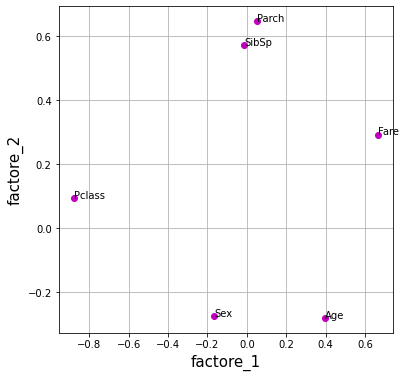

In [ ]:
#グラフ化 (2つの因子の因子負荷量)

# グラフ表示用関数
def plotting_fact_load_of_2_fact(x_fact, y_fact):
    #グラフ用データフレーム
    df = pd.DataFrame({
        x_fact : components_df.iloc[0].tolist(),
        y_fact : components_df.iloc[1].tolist()
    },
    index = components_df.columns)

    fig = plt.figure(figsize=(6,6))
    for exp_col in df.index.tolist():
        data = df.loc[exp_col]
        x_label = df.columns.tolist()[0]
        y_label = df.columns.to_list()[1]
        x = data[x_label]
        y = data[y_label]
        plt.plot(x,y,label = exp_col, marker = 'o',color = 'm')
        plt.annotate(exp_col, xy = (x,y))
    plt.xlabel(x_label,size=15) 
    plt.ylabel(y_label,size=15)
    plt.grid()

    print(f'x = {x_fact}, y = {y_fact}', '-'*80)

    display(df)
    plt.show()

plotting_fact_load_of_2_fact('factore_1','factore_2')